**Le problème d'apprentissage utilisé ici est un problème de clustering pour regrouper le sentiment des téléspectateurs sur un film**

**IMPORTATION DES PACKAGES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import seaborn as sns
import sklearn.feature_extraction.text import TfidTransformer
import sklearn.feature_extraction.text import CountVectorizer
import sklearn.cluster import KMeans

In [ ]:
training_data = sklearn.datasets.load_files('train')

In [ ]:
df = np.array(train.data)
df.shape

In [ ]:
df1 = pd.DataFrame(df)
df1

In [ ]:
vectorizer = CountVectorizer()
X_vector = vectorizer.fit_transform(df1)
# transf = TfidfTransformer(use_idf=False).fit_transform(X_vector)
# X_transf = transf.transform.fit_transform(X_vector)  
# X_transf.shape

In [ ]:
tfidf_transf = TfidfTransformer()
X_tfidf = tfidf_transf.fit_transform(X_vector)
print(X_tfidf)

In [ ]:
df_idf = pd.DataFrame(X_tfidf)
df_idf

**Utilisation de Elbow pour avoir le nombre de clusters**

In [ ]:
inert = []
for k in range(1, 10):
  km= KMeans(n_clusters = k, n_init = 10)
  km.fit(X_tfidf)
  inert.append(km.inertia_)

In [ ]:
plt.plot(range(1, 10), inert)
plt.title('La Methode ELBOW')
plt.xlabel('Nombres de Clusters')
plt.ylabel('Inertia')
plt.show

**Modelisation**

In [ ]:
model = KMeans(n_clusters = 4)
df1['Cluster'] = model.fit_predict(X_tfidf)

In [ ]:
df1['Cluster'] = df1['Cluster'].astype('category')

In [ ]:
len(model.labels_)

In [ ]:
d.head(20)

In [ ]:
sns.scatterplot(np.arange(0, 50000), X_tfidf.data[:50000], hue=df1['Cluster'][:50000])

In [ ]:
df1[df1['Cluster']==0]

**Formulation mathématique**

Le regroupement est l'une des techniques d'analyse de données exploratoires les plus courantes utilisées pour se faire une idée de la structure des données. Elle peut être définie comme la tâche d'identification des sous-groupes dans les données de telle sorte que les points de données dans le même sous-groupe (cluster) soient très similaires tandis que les points de données dans différents clusters sont très différents. En d'autres termes, nous essayons de trouver des sous-groupes homogènes dans les données de telle sorte que les points de données dans chaque cluster soient aussi similaires que possible selon une mesure de similitude telle que la distance euclidienne ou la distance basée sur la corrélation. La décision relative à la mesure de similitude à utiliser dépend de l'application.

L' algorithme Kmeans est un algorithme itératif qui tente de partitionner l'ensemble de données en K sous-groupes (clusters) distincts et non chevauchants prédéfinis où chaque point de données appartient à un seul groupe . Il essaie de rendre les points de données intra-cluster aussi similaires que possible tout en gardant les clusters aussi différents (loin) que possible. Il attribue des points de données à un cluster de telle sorte que la somme de la distance au carré entre les points de données et le centre de gravité du cluster (moyenne arithmétique de tous les points de données appartenant à ce cluster) soit au minimum. Moins nous avons de variation au sein des clusters, plus les points de données sont homogènes (similaires) au sein du même cluster.

Le fonctionnement de l'algorithme kmeans est le suivant:

Précisez le nombre de grappes K .
Initialisez les centres de gravité en mélangeant d'abord le jeu de données, puis en sélectionnant au hasard K points de données pour les centres de gravité sans remplacement.
Continuez à itérer jusqu'à ce qu'il n'y ait aucune modification des centres de gravité. c'est-à-dire que l'attribution des points de données aux clusters ne change pas.
Calculez la somme de la distance au carré entre les points de données et tous les centres de gravité.
Attribuez chaque point de données au cluster le plus proche (centroïde).
Calculez les centres de gravité des clusters en prenant la moyenne de tous les points de données appartenant à chaque cluster.
La fonction objectif est:
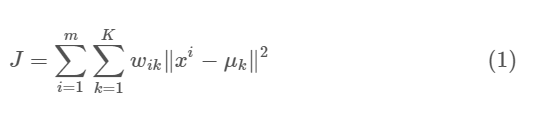

**Dans notre cas nous avons:**

Un Modèle (se reférant à la fonction objectif ci-dessus)/                        
Un Paramètre: determinant le nombre d'initialisation des centroides, la détermination de la génération de nbres aléatoires pour l'initialisation centroide/                                                               L'Hyperparamètre : la methode elbow nous permet d'avoir le k optimale